Projekt Wizualizacja Danych: Gry Komputerowe, Platforma Steam

Biblioteki:

In [2]:
import requests
import json
import requests
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

Pobranie danych ze strony steamspy dla top 100 gier forever w celu ustalenia 5 najbardziej popularnych gatunków gier na platformie Steam

In [3]:
# Pobieranie danych z API
url = 'https://steamspy.com/api.php?request=top100forever'
response = requests.get(url)
data = response.json()

# Tworzenie słownika gatunków gier
genres_count = {}

# Wyłuskiwanie informacji dla każdego appid
for index, (appid, game_data) in enumerate(data.items(), start=1):
    url = f"https://steamspy.com/api.php?request=appdetails&appid={appid}"
    response = requests.get(url)
    if response.status_code == 200:
        game_info = response.json()
        print(f"Przeszukiwanie {index}/{len(data)} - Pobrano informacje o appid: {appid}")
        genres = game_info.get('genre', '').split(', ')
        for genre in genres:
            genres_count[genre] = genres_count.get(genre, 0) + 1
    else:
        print(f"Nie udało się pobrać informacji dla appid {appid}")

# Sortowanie gatunków wg liczby gier
top_genres = sorted(genres_count.items(), key=lambda x: x[1], reverse=True)

# Wyświetlanie top 5 gatunków
print("Top 5 najczęściej występujących gatunków:")
for index, (genre, count) in enumerate(top_genres[:5], start=1):
    print(f"{index}. {genre}: {count}")


Przeszukiwanie 1/100 - Pobrano informacje o appid: 570
Przeszukiwanie 2/100 - Pobrano informacje o appid: 730
Przeszukiwanie 3/100 - Pobrano informacje o appid: 578080
Przeszukiwanie 4/100 - Pobrano informacje o appid: 1063730
Przeszukiwanie 5/100 - Pobrano informacje o appid: 1623730
Przeszukiwanie 6/100 - Pobrano informacje o appid: 1172470
Przeszukiwanie 7/100 - Pobrano informacje o appid: 440
Przeszukiwanie 8/100 - Pobrano informacje o appid: 1938090
Przeszukiwanie 9/100 - Pobrano informacje o appid: 271590
Przeszukiwanie 10/100 - Pobrano informacje o appid: 550
Przeszukiwanie 11/100 - Pobrano informacje o appid: 1599340
Przeszukiwanie 12/100 - Pobrano informacje o appid: 304930
Przeszukiwanie 13/100 - Pobrano informacje o appid: 553850
Przeszukiwanie 14/100 - Pobrano informacje o appid: 230410
Przeszukiwanie 15/100 - Pobrano informacje o appid: 236390
Przeszukiwanie 16/100 - Pobrano informacje o appid: 1245620
Przeszukiwanie 17/100 - Pobrano informacje o appid: 105600
Przeszukiwan

Dalsze wyłuskiwanie danych. Dla top 5 gatunków poniżej uzyskuje dane dla najpopularniejszej gry w danym garunku pod względem graczy oraz dla uśrednionej wartości top 100 gier. Wyłuskiwane dane to np. liczba pozytywnych i negatywnych recenzji oraz utworzenie dla nich proporcji, zliczanie publisherów oraz developerów, następnie pokazanie liczby graczy oraz cen w przedziałach.

In [40]:
# Inicjalizacja kontenerów dla danych
genre_data = {}
average_positive_to_negative_ratio = {}

# Pobieranie danych z API
for genre in top_genres[:5]:
    genre_name = genre[0].replace(" ", "+")
    print(f"{genre_name}")
    url = f'https://steamspy.com/api.php?request=genre&genre={genre_name}'
    response = requests.get(url)
    data = response.json()

    # Przechowywanie danych dla danego genre_name
    genre_info = []
    developers = []
    publishers = []
    positive_reviews_total = 0
    negative_reviews_total = 0
    owners_counter = Counter()
    price_counter = Counter()

    total_games_used = 0  # Liczba gier użytych do utworzenia uśrednionego zestawienia

    highest_price_game = None
    lowest_price_game = None
    highest_price = float('-inf')
    lowest_price = float('inf')

    for index, (appid, info) in enumerate(data.items()):
        # Uśrednianie danych dla wszystkich gier
        developers.append(info["developer"])
        publishers.append(info["publisher"])
        positive_reviews_total += info["positive"]
        negative_reviews_total += info["negative"]
        owners_counter.update([info["owners"]])
        price_counter.update([info["price"]])
        total_games_used += 1

        # Sprawdzenie najdroższej i najtańszej gry
        price = float(info["price"])
        if price > highest_price:
            highest_price = price
            highest_price_game = {
                "name": info["name"],
                "price": info["price"]
            }
        if price < lowest_price:
            lowest_price = price
            lowest_price_game = {
                "name": info["name"],
                "price": info["price"]
            }

        if index == 0:
            # Najpopularniejsza gra w danym genre
            most_popular_game = {
                "name": info["name"],
                "developer": info["developer"],
                "publisher": info["publisher"],
                "positive_reviews": info["positive"],
                "negative_reviews": info["negative"],
                "owners": info["owners"],
                "price": info["price"]
            }

    # Obliczanie proporcji pozytywnych do negatywnych recenzji
    if index > 0:
        average_positive_to_negative_ratio[genre_name] = (positive_reviews_total / negative_reviews_total)

    # Obliczanie najczęściej występującego developera i publishera
    most_common_developer = Counter(developers).most_common(1)[0]
    most_common_publisher = Counter(publishers).most_common(1)[0]

    # Obliczanie najczęściej występującej liczby właścicieli oraz ceny
    most_common_owners = owners_counter.most_common(1)[0][0]
    most_common_owners_count = owners_counter.most_common(1)[0][1]  # Liczba wystąpień najczęstszego właściciela
    most_common_price = price_counter.most_common(1)[0][0]
    most_common_price_count = price_counter.most_common(1)[0][1]  # Liczba wystąpień najczęstszej ceny

    # Dystrybucja cen gier
    price_distribution = {}
    price_ranges = [("$0 - $10", 0, 10), ("$10 - $20", 10, 20), ("$20 - $30", 20, 30), ("$30 - $40", 30, 40), ("$40 - $50", 40, 50), ("$50 - $60", 50, 60), ("$60 - $70", 60, 70), ("$70 - $80", 70, 80), ("$80 - $90", 80, 90), ("$90 - $100", 90, 100), ("> $100", 100, float('inf'))]
    for price_range in price_ranges:
        price_distribution[price_range[0]] = sum(count for price, count in price_counter.items() if price_range[1] <= float(price) < price_range[2])

    # Zapisanie danych do kontenera
    genre_data[genre_name] = {
        "most_popular_game": most_popular_game,
        "average_developer": most_common_developer[0],
        "average_publisher": most_common_publisher[0],
        "average_developer_appearances": most_common_developer[1],
        "average_publisher_appearances": most_common_publisher[1],
        "average_positive_to_negative_ratio": average_positive_to_negative_ratio.get(genre_name, 0),
        "most_common_owners": most_common_owners,
        "most_common_owners_count": most_common_owners_count,
        "most_common_price": most_common_price,
        "most_common_price_count": most_common_price_count,
        "total_games_used": total_games_used,
        "highest_price_game": highest_price_game,
        "lowest_price_game": lowest_price_game,
        "owners_distribution": owners_counter,
        "price_distribution": price_distribution
    }

# Wyświetlenie zestawienia danych dla każdego genre_name
for genre_name, data in genre_data.items():
    print(f"Zestawienie danych dla {genre_name}:")
    print(f"   Total Games Used for Averaging: {data['total_games_used']}")
    print("\n")
    print("Najpopularniejsza gra:")
    print(f"   Name: {data['most_popular_game']['name']}")
    print(f"   Developer: {data['most_popular_game']['developer']}")
    print(f"   Publisher: {data['most_popular_game']['publisher']}")
    print(f"   Positive Reviews: {data['most_popular_game']['positive_reviews']}")
    print(f"   Negative Reviews: {data['most_popular_game']['negative_reviews']}")
    print(f"   Owners: {data['most_popular_game']['owners']}")
    print(f"   Price: {data['most_popular_game']['price']}")
    print("\n")
    print("Dane uśrednione:")
    print(f"   Most Popular Developer: {data['average_developer']} (Appearances: {data['average_developer_appearances']})")
    print(f"   Most Popular Publisher: {data['average_publisher']} (Appearances: {data['average_publisher_appearances']})")
    print(f"   Average Positive to Negative Ratio: {data['average_positive_to_negative_ratio']}")
    print(f"   Most Common Owners: {data['most_common_owners']} (Count: {data['most_common_owners_count']})")
    print(f"   Most Common Price: {data['most_common_price']} (Count: {data['most_common_price_count']})")
    print(f"   Highest Price Game: {data['highest_price_game']['name']} (${data['highest_price_game']['price']})")
    print(f"   Lowest Price Game: {data['lowest_price_game']['name']} (${data['lowest_price_game']['price']})")
    print("\n")
    print("Dystrybucja liczby właścicieli:")
    for owner_range, count in data['owners_distribution'].items():
        print(f"   Owners: {owner_range}, Games: {count}")
    print("\n")
    print("Dystrybucja cen:")
    for price_range, count in data['price_distribution'].items():
        print(f"   Price Range: {price_range}, Games: {count}")
    print("\n")


Action
Adventure
Indie
RPG
Free+to+Play
Zestawienie danych dla Action:
   Total Games Used for Averaging: 31174


Najpopularniejsza gra:
   Name: Dota 2
   Developer: Valve
   Publisher: Valve
   Positive Reviews: 1831009
   Negative Reviews: 405513
   Owners: 200,000,000 .. 500,000,000
   Price: 0


Dane uśrednione:
   Most Popular Developer: Dnovel (Appearances: 48)
   Most Popular Publisher: Conglomerate 5 (Appearances: 129)
   Average Positive to Negative Ratio: 5.566404649588533
   Most Common Owners: 0 .. 20,000 (Count: 20957)
   Most Common Price: 0 (Count: 4066)
   Highest Price Game: Ascent Free-Roaming VR Experience ($99900)
   Lowest Price Game: Dota 2 ($0)


Dystrybucja liczby właścicieli:
   Owners: 200,000,000 .. 500,000,000, Games: 1
   Owners: 100,000,000 .. 200,000,000, Games: 1
   Owners: 50,000,000 .. 100,000,000, Games: 9
   Owners: 20,000,000 .. 50,000,000, Games: 19
   Owners: 10,000,000 .. 20,000,000, Games: 37
   Owners: 5,000,000 .. 10,000,000, Games: 87
   Own

Utworzenie zestawienia danych dla powyższego rezultatu

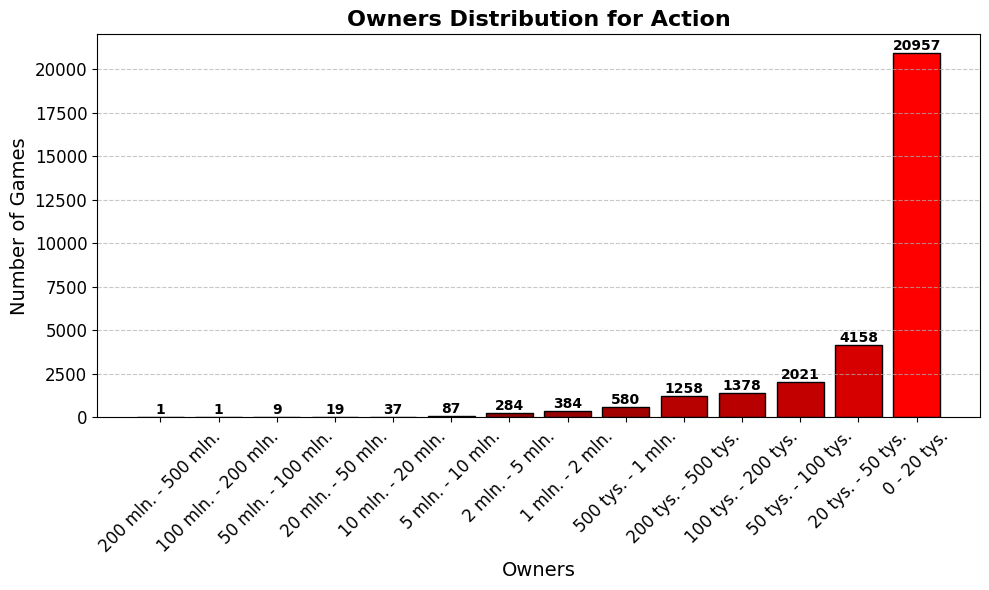

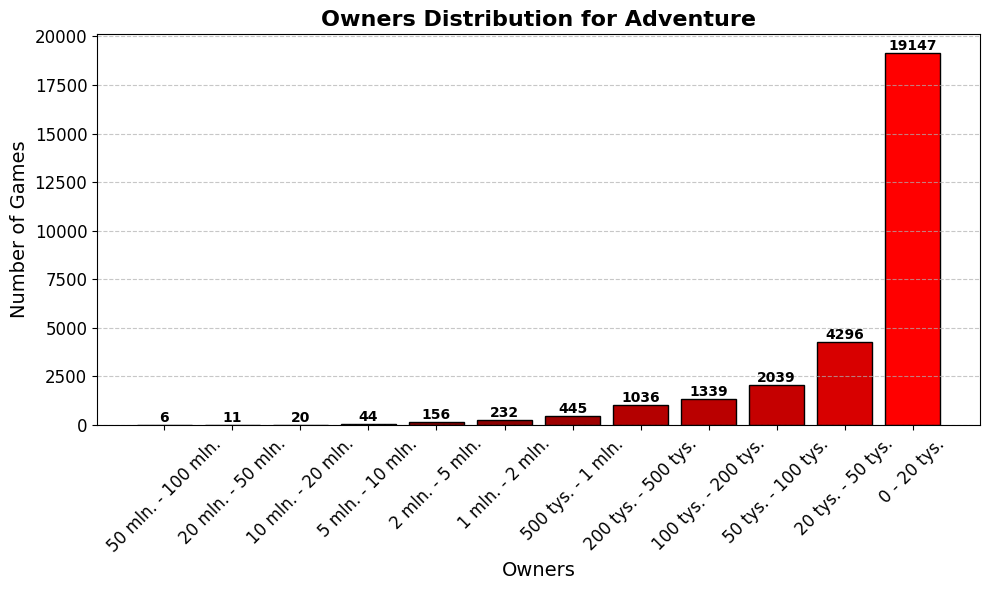

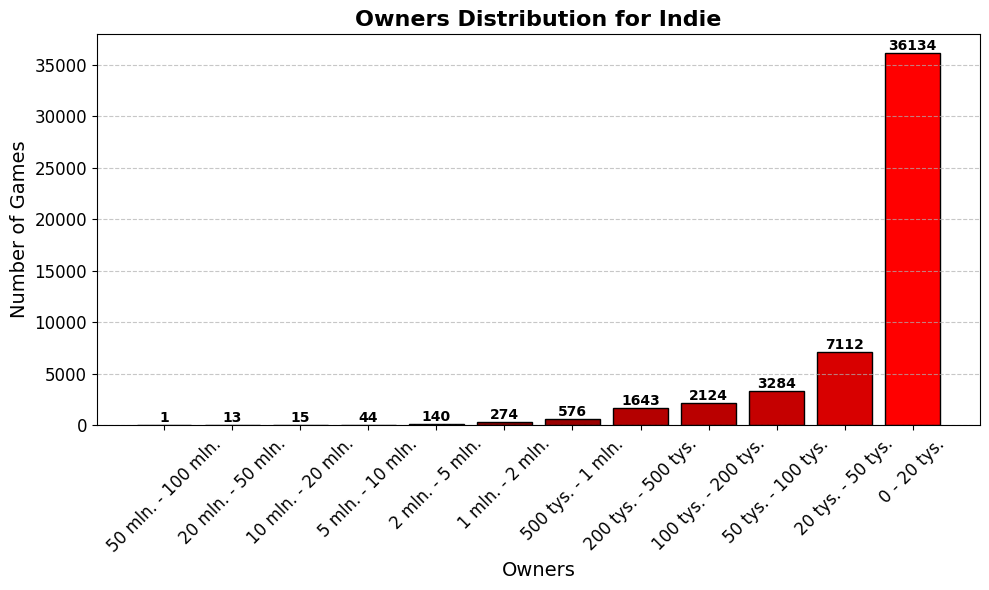

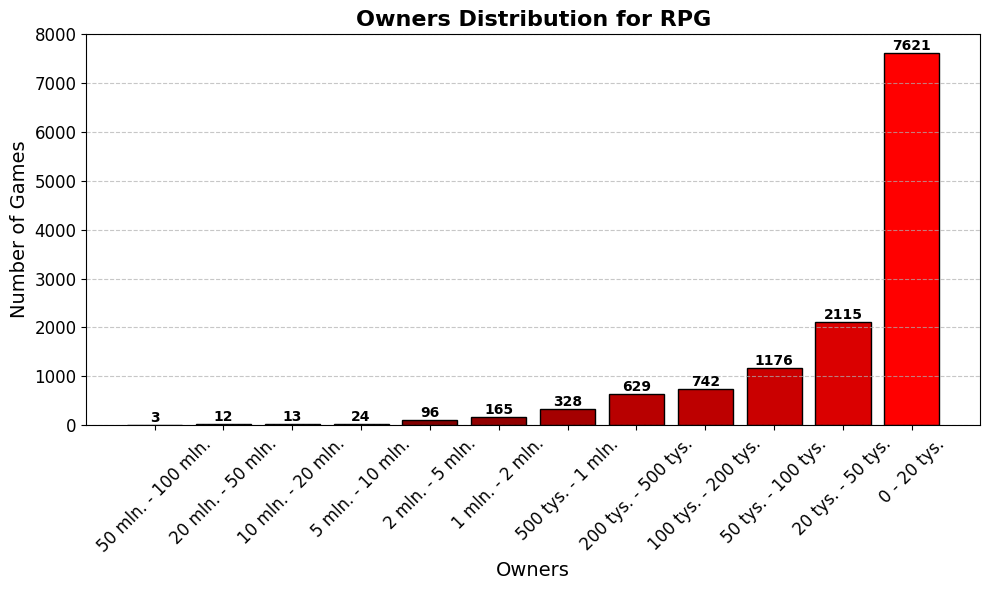

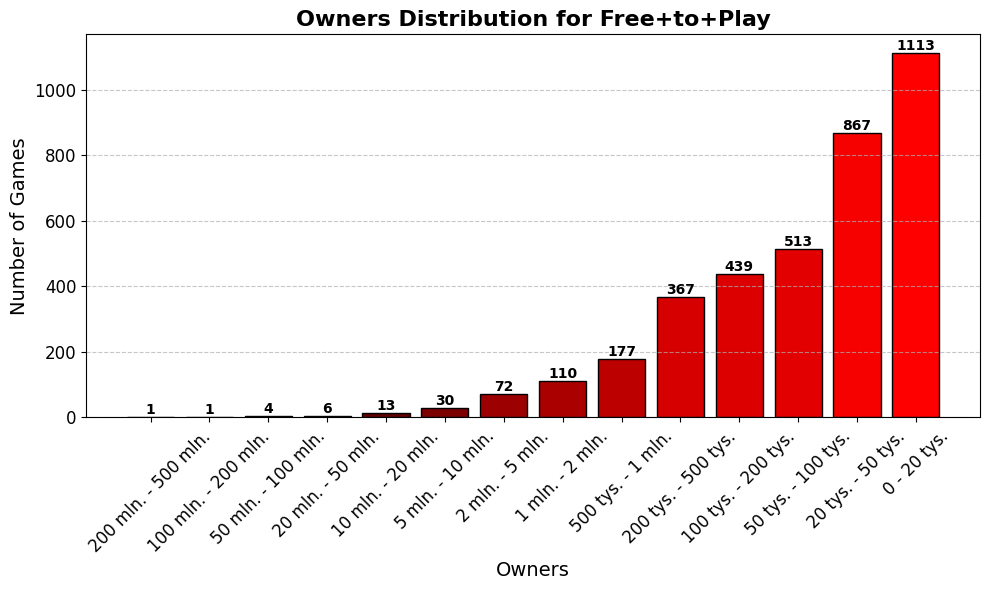

In [43]:
# Funkcja do generowania wykresu słupkowego z gradientem czerwieni
def generate_bar_chart_red_gradient(data, title, xlabel, ylabel, isGCA):
    labels = list(data.keys())
    values = list(data.values())

    # Obliczenie kolorów w gradientzie czerwieni w zależności od wartości danych
    max_value = max(values)
    log_values = [np.log10(value + 1) for value in values]  # Logarytmiczna transformacja wartości
    colors = [(np.log10(value + 1) / np.log10(max_value + 1), 0, 0) for value in values]  # Zastosowanie logarytmicznej skali czerwieni

    # Tworzenie wykresu słupkowego
    plt.figure(figsize=(10, 6))
    bars = plt.bar(labels, values, color=colors, edgecolor='black')

    # Dodanie wartości nad słupkami
    for bar in bars:
        yval = bar.get_height()
        xpos = bar.get_x() + bar.get_width() / 2
        plt.text(xpos, yval, round(yval, 2), ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.xticks(np.arange(len(labels)), labels) # Ustawienie etykiet zamiast ticków
    if (isGCA):
        plt.gca().set_xticklabels(['0 - 20 tys.', '20 tys. - 50 tys.', '50 tys. - 100 tys.', '100 tys. - 200 tys.', '200 tys. - 500 tys.', '500 tys. - 1 mln.', '1 mln. - 2 mln.', '2 mln. - 5 mln.', '5 mln. - 10 mln.', '10 mln. - 20 mln.', '20 mln. - 50 mln.', '50 mln. - 100 mln.', '100 mln. - 200 mln.', '200 mln. - 500 mln.'][::-1]) # Zmiana etykiet
    else:
        plt.gca().set_xticklabels(['0 - 20 tys.', '20 tys. - 50 tys.', '50 tys. - 100 tys.', '100 tys. - 200 tys.', '200 tys. - 500 tys.', '500 tys. - 1 mln.', '1 mln. - 2 mln.', '2 mln. - 5 mln.', '5 mln. - 10 mln.', '10 mln. - 20 mln.', '20 mln. - 50 mln.', '50 mln. - 100 mln.'][::-1]) # Zmiana etykiet
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Dystrybucja liczby właścicieli dla każdego gatunku gier
for indeks, (genre_name, data) in enumerate(genre_data.items()):
  if (indeks == 1 or indeks == 2 or indeks == 3):
    generate_bar_chart_red_gradient(data['owners_distribution'], f'Owners Distribution for {genre_name}', 'Owners', 'Number of Games', False)
  else:
    generate_bar_chart_red_gradient(data['owners_distribution'], f'Owners Distribution for {genre_name}', 'Owners', 'Number of Games', True)


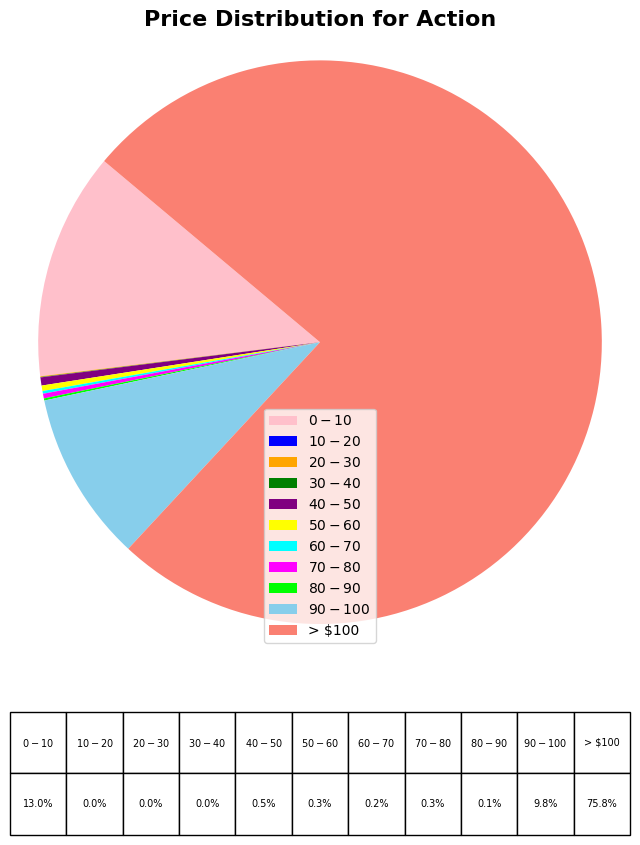

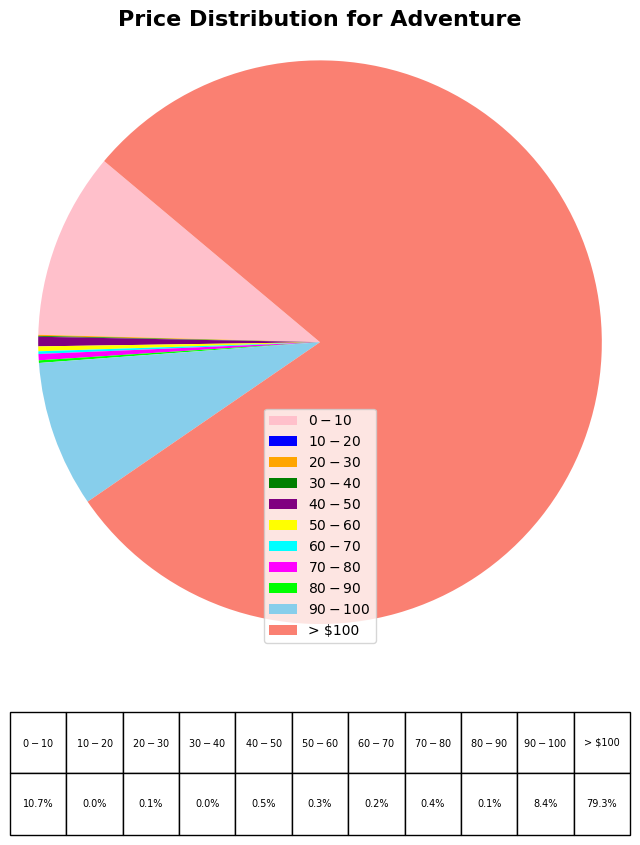

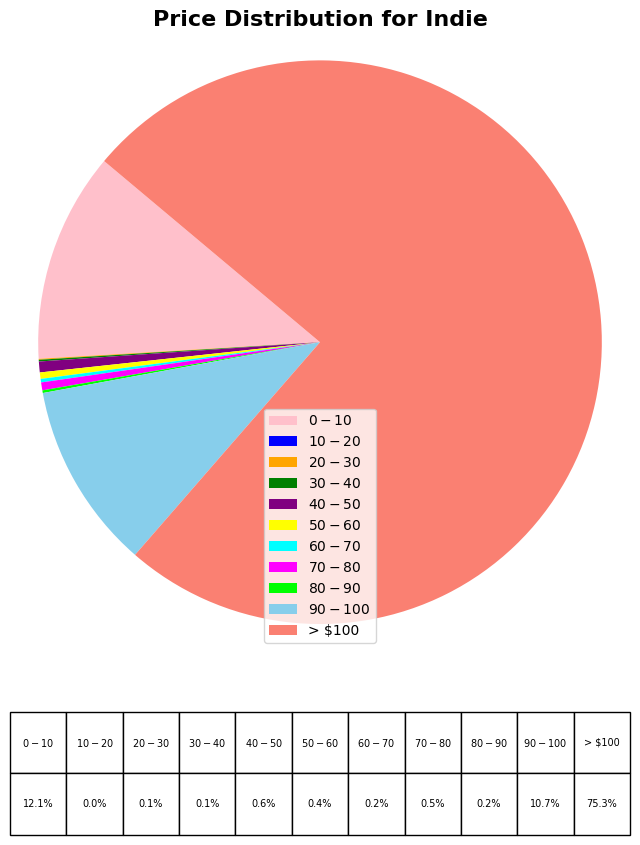

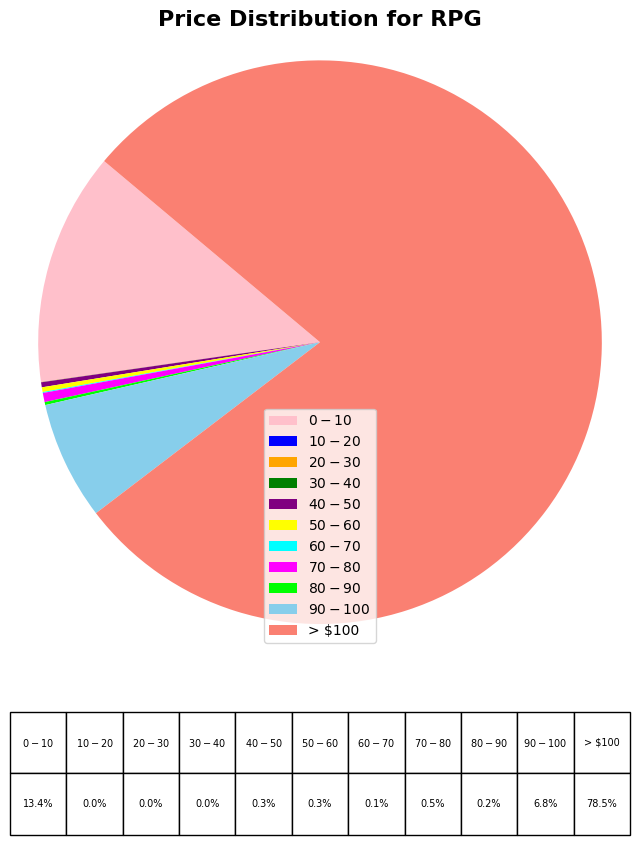

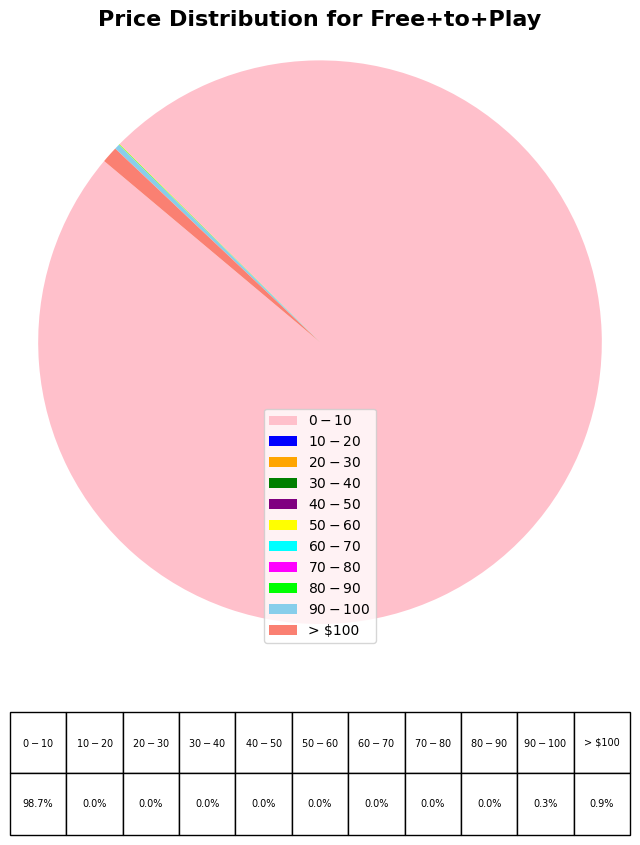

In [44]:
# Funkcja do generowania spersonalizowanego wykresu kołowego z wartościami bezwzględnymi
def generate_personalized_pie_chart_absolute(data, title):
    labels = list(data.keys())
    values = list(data.values())

    # Zdefiniowanie listy kolorów
    colors = ['pink', 'blue', 'orange', 'green', 'purple', 'yellow', 'cyan', 'magenta', 'lime', 'skyblue', 'salmon', 'gold', 'teal']

    plt.figure(figsize=(8, 8))
    patches, _ = plt.pie(values, labels=[''] * len(labels), startangle=140, colors=colors, textprops={'fontsize': 12, 'fontweight': 'bold'})
    plt.legend(patches, labels, loc="best")
    plt.title(title, fontsize=16, fontweight='bold')
    plt.axis('equal')  # Ustawienie wykresu na koło

    # Dodanie tabeli z wartościami procentowymi
    plt.table(cellText=[[f'{val / sum(values) * 100:.1f}%' for val in values]], colLabels=labels, cellLoc='center', loc='bottom', bbox=[0, -0.3, 1, 0.2])

    plt.show()

# Dystrybucja cen dla każdego gatunku gier
for genre_name, data in genre_data.items():
    generate_personalized_pie_chart_absolute(data['price_distribution'], f'Price Distribution for {genre_name}')